## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Datasets: Toy dataset, Diabetes, Landsat, Shuttle
#### Modules: Scikit-learn and H2o
#### Edgar Acuna 
#### Abril 2021

In [84]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [85]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [149]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [150]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=99, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [151]:
#Showing  the weights
mlp.coefs_

[array([[-1.92820890e+01, -2.19841893e-02,  4.66104299e+01,
         -1.21213273e+01, -1.66590970e+01],
        [ 9.29642622e+01, -3.73196971e-01,  4.15511688e+01,
         -1.23324663e+01, -3.20026866e+00]]),
 array([[-7.18512710e-04],
        [ 9.44033864e-01],
        [ 1.11428608e-02],
        [ 1.96766347e+00],
        [-1.39397670e+00]])]

In [152]:
#Showing the biases
mlp.intercepts_

[array([-7.47131343,  0.45692388,  1.40025247, -0.1631193 ,  0.57265452]),
 array([-51.63764171])]

In [153]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.84499338e-10, 9.99999999e-01],
       [1.03206332e-12, 1.00000000e+00],
       [3.92151844e-09, 9.99999996e-01],
       [2.20098391e-08, 9.99999978e-01],
       [1.10263353e-07, 9.99999890e-01],
       [5.65724556e-09, 9.99999994e-01],
       [8.18338161e-04, 9.99181662e-01],
       [1.65178689e-03, 9.98348213e-01],
       [2.30747643e-10, 1.00000000e+00],
       [1.06037401e-10, 1.00000000e+00],
       [3.11151665e-01, 6.88848335e-01],
       [8.11610808e-06, 9.99991884e-01],
       [3.51427264e-06, 9.99996486e-01],
       [2.62681737e-02, 9.73731826e-01],
       [1.15009104e-04, 9.99884991e-01],
       [1.78336739e-01, 8.21663261e-01],
       [2.22541411e-02, 9.77745859e-01],
       [1.61044191e-04, 9.99838956e-01],
       [5.06839017e-07, 9.99999493e-01],
       [9.933608

In [154]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [155]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [156]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



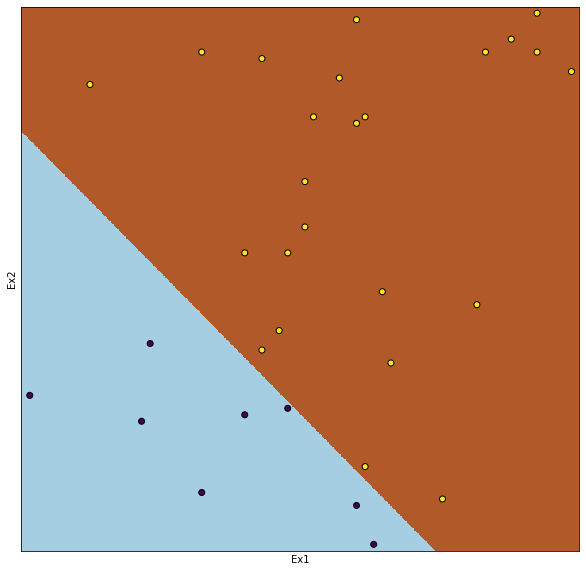

In [157]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [158]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.9


In [159]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=99, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [160]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [161]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [162]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

In [163]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.7749999999999999


### Example 2. Nnets applied to Diabetes

In [164]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


#### Splitting the data in training(70%) and test (30%) datasets

In [165]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [167]:
#mlp.coefs_

In [168]:
mlp.intercepts_

[array([ 0.53820032, -0.00960071,  0.55591167, -0.61728686,  0.11324956,
         0.24637423,  0.57027913, -0.47913492, -0.06801254,  0.14009837,
        -0.49421212, -0.55514385, -0.66179302,  0.44295137,  0.17989178,
         0.41879618, -0.47937651,  0.2172286 ,  0.09983219, -0.37920548]),
 array([0.3037135])]

The model has 201 parameters

In [169]:
pred=mlp.predict(X_test)

In [170]:
#Estimacion del error usando Training y test datasets
mlp.score(X_test, y_test)

0.7395833333333334

In [171]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.82      0.80       123
           2       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [172]:
#Estimating the accuracy using cross validation( 20 neurons)
from sklearn.model_selection import cross_val_score
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X1, y1) 
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.712218045112782


#### The overfitting problem in Neural Nets : Diabetes dataset

In [177]:
#Training a NN with one hidden layer and 5 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=5000,random_state=90)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.4830729166666667

In [178]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=5000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.6510416666666666

In [179]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=5000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.6471354166666666

In [180]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(hidden_layer_sizes=(500),max_iter=5000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.7786458333333334

In [181]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.6510416666666666

In [182]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6510416666666666

In [183]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6510416666666666

In [184]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.61328125

In [185]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8072916666666666

In [186]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.48311688311688317


In [187]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6406527682843473


In [188]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.617259056732741


In [189]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6927204374572795


### Example 3. Nnet  applied to Landsat 

In [190]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
#url='c://PW-PR/landsat.data'
data = pd.read_csv(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [192]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[244   0   2   0   0   0]
 [  1 108   0   0   1   0]
 [  4   2 213   1   0  18]
 [  1   3  65   5   1  38]
 [  6   0   1   0  97  15]
 [  0   1  25   2   5 250]]


In [193]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       246
           2       0.95      0.98      0.96       110
           3       0.70      0.89      0.78       238
           4       0.62      0.04      0.08       113
           5       0.93      0.82      0.87       119
           6       0.78      0.88      0.83       283

    accuracy                           0.83      1109
   macro avg       0.82      0.77      0.75      1109
weighted avg       0.82      0.83      0.79      1109



### IV. Deep Learning with MLP applied to Diabetes using H2o

In [194]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import  H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,4 days 17 hours 22 mins
H2O_cluster_timezone:,America/La_Paz
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_eacun_3dprm9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.441 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [195]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [196]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.7916666666666666]


In [197]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.13517099951790298
RMSE: 0.36765608864522153
LogLoss: 0.4171422568774305
Mean Per-Class Error: 0.19389552238805963
AUC: 0.8851791044776119
AUCPR: 0.8094424354757828
Gini: 0.7703582089552239

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41700813962055455: 


,,1,2,Error,Rate
0,1,377.0,123.0,0.246,(123.0/500.0)
1,2,38.0,230.0,0.1418,(38.0/268.0)
2,Total,415.0,353.0,0.2096,(161.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.417008,0.740741,208.0
1,max f2,0.189790,0.830103,290.0
2,max f0point5,0.710815,0.765683,113.0
3,max accuracy,0.710815,0.817708,113.0
4,max precision,0.994800,1.000000,0.0
5,max recall,0.009674,1.000000,388.0
6,max specificity,0.994800,1.000000,0.0
7,max absolute_mcc,0.588754,0.598806,154.0
8,max min_per_class_accuracy,0.488004,0.798507,187.0
9,max mean_per_class_accuracy,0.417008,0.806104,208.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 41.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.993196,2.865672,2.865672,1.000000,0.994133,1.000000,0.994133,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.985412,2.865672,2.865672,1.000000,0.990531,1.000000,0.992332,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.976253,2.865672,2.865672,1.000000,0.980413,1.000000,0.988359,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.964196,2.456290,2.773231,0.857143,0.969290,0.967742,0.984053,0.022388,0.111940,145.628998,177.323062,0.109940
4,5,0.050781,0.955266,2.507463,2.718714,0.875000,0.959189,0.948718,0.978953,0.026119,0.138060,150.746269,171.871412,0.134060
5,6,0.100260,0.922324,2.488610,2.605156,0.868421,0.939663,0.909091,0.959563,0.123134,0.261194,148.860958,160.515604,0.247194
6,7,0.151042,0.851976,2.204363,2.470407,0.769231,0.886192,0.862069,0.934895,0.111940,0.373134,120.436280,147.040659,0.341134
7,8,0.200521,0.803072,2.262372,2.419073,0.789474,0.827770,0.844156,0.908462,0.111940,0.485075,126.237235,141.907346,0.437075
8,9,0.300781,0.670473,1.823609,2.220585,0.636364,0.731081,0.774892,0.849335,0.182836,0.667910,82.360923,122.058538,0.563910
9,10,0.399740,0.503867,1.168892,1.960231,0.407895,0.583937,0.684039,0.783634,0.115672,0.783582,16.889238,96.023142,0.589582


In [198]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [199]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1618348179474_3696


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0,,,,,,,,,
1,,2,20,Rectifier,0,0,0,0.000549995,0.000371479,0,-0.00159735,0.405848,0.522654,0.181982
2,,3,20,Rectifier,0,0,0,0.000723421,0.00052843,0,-0.0156436,0.358892,0.997026,0.145427
3,,4,20,Rectifier,0,0,0,0.00123915,0.00122527,0,-0.00740018,0.418925,0.979177,0.215182
4,,5,2,Softmax,,0,0,0.00146597,0.000799667,0,0.058072,1.58344,0.0102525,0.0936533




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.052270662443327294
RMSE: 0.2286277814337691
LogLoss: 0.1923710560342298
Mean Per-Class Error: 0.05892537313432833
AUC: 0.983179104477612
AUCPR: 0.9677847058951901
Gini: 0.9663582089552241

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7929814439047034: 


,,1,2,Error,Rate
0,1,478.0,22.0,0.044,(22.0/500.0)
1,2,22.0,246.0,0.0821,(22.0/268.0)
2,Total,500.0,268.0,0.0573,(44.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.792981,0.917910,149.0
1,max f2,0.448608,0.944767,184.0
2,max f0point5,0.840759,0.925076,141.0
3,max accuracy,0.840759,0.942708,141.0
4,max precision,0.999998,1.000000,0.0
5,max recall,0.024293,1.000000,292.0
6,max specificity,0.999998,1.000000,0.0
7,max absolute_mcc,0.792981,0.873910,149.0
8,max min_per_class_accuracy,0.694253,0.936567,162.0
9,max mean_per_class_accuracy,0.448608,0.941075,184.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 39.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,9.999999e-01,2.865672,2.865672,1.000000,9.999999e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,9.999990e-01,2.865672,2.865672,1.000000,9.999996e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,9.999967e-01,2.865672,2.865672,1.000000,9.999979e-01,1.000000,0.999999,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,9.999451e-01,2.865672,2.865672,1.000000,9.999748e-01,1.000000,0.999987,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,9.992547e-01,2.792193,2.840968,0.974359,9.997466e-01,0.991379,0.999906,0.141791,0.429104,179.219288,184.096758,0.427104
7,8,0.200521,9.955451e-01,2.714847,2.809847,0.947368,9.978688e-01,0.980519,0.999404,0.134328,0.563433,171.484682,180.984687,0.557433
8,9,0.300781,9.180442e-01,2.530723,2.716806,0.883117,9.754662e-01,0.948052,0.991424,0.253731,0.817164,153.072301,171.680558,0.793164
9,10,0.399740,4.186006e-01,1.545954,2.426953,0.539474,7.371427e-01,0.846906,0.928475,0.152985,0.970149,54.595444,142.695318,0.876149




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.1842602224709856
RMSE: 0.42925542800410293
LogLoss: 0.5792072517207598
Mean Per-Class Error: 0.2753880597014926
AUC: 0.7922089552238806
AUCPR: 0.6888742254214169
Gini: 0.5844179104477611

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4161858028847599: 


,,1,2,Error,Rate
0,1,372.0,128.0,0.256,(128.0/500.0)
1,2,79.0,189.0,0.2948,(79.0/268.0)
2,Total,451.0,317.0,0.2695,(207.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.416186,0.646154,200.0
1,max f2,0.107404,0.764632,325.0
2,max f0point5,0.779531,0.649351,95.0
3,max accuracy,0.779531,0.750000,95.0
4,max precision,0.996872,1.000000,0.0
5,max recall,0.001144,1.000000,398.0
6,max specificity,0.996872,1.000000,0.0
7,max absolute_mcc,0.416186,0.434908,200.0
8,max min_per_class_accuracy,0.394372,0.720149,208.0
9,max mean_per_class_accuracy,0.416186,0.724612,200.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 38.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.988903,2.507463,2.507463,0.875000,0.992993,0.875000,0.992993,0.026119,0.026119,150.746269,150.746269,0.024119
1,2,0.020833,0.982441,2.507463,2.507463,0.875000,0.985908,0.875000,0.989451,0.026119,0.052239,150.746269,150.746269,0.048239
2,3,0.031250,0.978696,2.507463,2.507463,0.875000,0.980083,0.875000,0.986328,0.026119,0.078358,150.746269,150.746269,0.072358
3,4,0.040365,0.970782,2.456290,2.495908,0.857143,0.972977,0.870968,0.983313,0.022388,0.100746,145.628998,149.590756,0.092746
4,5,0.050781,0.962027,2.507463,2.498278,0.875000,0.967545,0.871795,0.980079,0.026119,0.126866,150.746269,149.827784,0.116866
5,6,0.100260,0.904294,2.639434,2.567940,0.921053,0.934050,0.896104,0.957363,0.130597,0.257463,163.943441,156.793952,0.241463
6,7,0.151042,0.849241,1.616533,2.248070,0.564103,0.878691,0.784483,0.930913,0.082090,0.339552,61.653272,124.806999,0.289552
7,8,0.200521,0.788597,1.659073,2.102733,0.578947,0.817962,0.733766,0.903042,0.082090,0.421642,65.907306,110.273309,0.339642
8,9,0.300781,0.614493,1.339795,1.848420,0.467532,0.705028,0.645022,0.837037,0.134328,0.555970,33.979453,84.842024,0.391970
9,10,0.399740,0.438727,1.282011,1.708202,0.447368,0.518366,0.596091,0.758148,0.126866,0.682836,28.201100,70.820166,0.434836




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.759336,0.054967426,0.8,0.765625,0.63414633,0.77922076,0.72839504,0.775,0.7605634,0.8023256,0.7195122,0.82857144
1,auc,0.80488694,0.04721475,0.7866541,0.8230694,0.7396413,0.8388889,0.845098,0.822884,0.7685185,0.8005521,0.7389474,0.88461536
2,aucpr,0.707239,0.09157226,0.59743476,0.8050449,0.7084095,0.80456066,0.7740007,0.5930072,0.6636401,0.6536578,0.6353108,0.8373235
3,err,0.24066402,0.054967426,0.2,0.234375,0.36585367,0.22077923,0.27160493,0.225,0.23943663,0.19767442,0.2804878,0.17142858
4,err_count,18.6,5.1467357,15.0,15.0,30.0,17.0,22.0,18.0,17.0,17.0,23.0,12.0
5,f0point5,0.647952,0.06905361,0.6043956,0.7209302,0.5762082,0.7267442,0.6306306,0.59859157,0.6725146,0.6296296,0.5590062,0.76086956
6,f1,0.6976539,0.06954968,0.5945946,0.8051948,0.67391306,0.74626863,0.71794873,0.65384614,0.73015875,0.6666667,0.6101695,0.7777778
7,f2,0.76029736,0.09219304,0.5851064,0.9117647,0.8115183,0.76687115,0.8333333,0.720339,0.7986111,0.7083333,0.67164177,0.79545456
8,lift_top_group,2.9580414,0.6432965,3.9473684,2.064516,2.4848485,2.40625,2.7,3.6363637,2.6296296,3.7391305,3.28,2.6923077
9,logloss,0.5803624,0.088030316,0.48486924,0.671956,0.6776972,0.571085,0.49274877,0.5685636,0.7186333,0.57071203,0.59158504,0.4557739



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-18 10:32:59,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-18 10:32:59,7.565 sec,284444 obs/sec,10.0,1,7680.0,0.386856,0.457738,0.341257,0.859914,0.773960,2.865672,0.222656
2,,2021-04-18 10:33:00,9.152 sec,242676 obs/sec,510.0,51,391680.0,0.228628,0.192371,0.769922,0.983179,0.967785,2.865672,0.057292



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,1.000000,1.000000,0.145953
1,C3,0.949918,0.949918,0.138644
2,C1,0.917356,0.917356,0.133891
3,C5,0.871490,0.871490,0.127197
4,C2,0.835591,0.835591,0.121957
5,C7,0.767224,0.767224,0.111979
6,C4,0.763055,0.763055,0.111371
7,C6,0.746865,0.746865,0.109008


<bound method H2OBinomialModel.confusion_matrix of >

### V . Deep Learning with MLP applied  to Shuttle with h2o

In [200]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [201]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.9992413793103448]


In [202]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0006669182458192398
RMSE: 0.025824760324526533
LogLoss: 0.010307327060694248
Mean Per-Class Error: 0.0687875011541189
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34104.0,0.0,1.0,1.0,1.0,0.0,1.0,0.000117,"4 / 34,108"
1,0.0,36.0,0.0,0.0,1.0,0.0,0.0,0.027027,1 / 37
2,3.0,0.0,129.0,0.0,0.0,0.0,0.0,0.022727,3 / 132
3,3.0,1.0,0.0,6742.0,1.0,1.0,0.0,0.000889,"6 / 6,748"
4,4.0,0.0,1.0,6.0,2442.0,5.0,0.0,0.006509,"16 / 2,458"
5,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.333333,2 / 6
6,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.090909,1 / 11
7,34115.0,38.0,131.0,6749.0,2446.0,10.0,11.0,0.000759,"33 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.999241
1,2,0.999793
2,3,0.999862
3,4,0.999908
4,5,0.999954
5,6,0.999954
6,7,1.000000


In [203]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1618348179474_3790


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,800,993 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.430256,0.37949,0,0.0519749,0.919129,0.661011,1.32914
2,,3,20,Rectifier,0,0,0,0.376205,0.395597,0,0.0457519,0.756969,1.01225,0.84522
3,,4,7,Softmax,,0,0,0.62529,0.372427,0,-1.7186,1.79953,-1.00818,0.317646




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.00091650121285419
RMSE: 0.030273771037883437
LogLoss: 0.016430376969671177
Mean Per-Class Error: 0.08877969179179522
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 7,680"
1,0.0,12.0,0.0,0.0,1.0,0.0,0.0,0.076923,1 / 13
2,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.035714,1 / 28
3,0.0,1.0,0.0,1518.0,0.0,1.0,0.0,0.001316,"2 / 1,520"
4,0.0,0.0,0.0,2.0,529.0,2.0,0.0,0.007505,4 / 533
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.500000,1 / 2
6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0 / 2
7,7681.0,14.0,27.0,1520.0,530.0,4.0,2.0,0.000920,"9 / 9,778"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.999080
1,2,0.999693
2,3,0.999693
3,4,0.999795
4,5,1.000000
5,6,1.000000
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0009558322337190411
RMSE: 0.030916536573798836
LogLoss: 0.010388095672878465
Mean Per-Class Error: 0.22777664084172056
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,1.0,3.0,0.0,1.0,0.0,2.0,0.000205,"7 / 34,108"
1,1.0,32.0,0.0,1.0,3.0,0.0,0.0,0.135135,5 / 37
2,6.0,0.0,124.0,2.0,0.0,0.0,0.0,0.060606,8 / 132
3,2.0,1.0,1.0,6742.0,1.0,1.0,0.0,0.000889,"6 / 6,748"
4,5.0,0.0,1.0,2.0,2449.0,1.0,0.0,0.003662,"9 / 2,458"
5,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.666667,4 / 6
6,6.0,0.0,2.0,0.0,0.0,0.0,3.0,0.727273,8 / 11
7,34121.0,35.0,131.0,6747.0,2457.0,4.0,5.0,0.001080,"47 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998920
1,2,0.999701
2,3,0.999816
3,4,0.999862
4,5,0.999885
5,6,0.999931
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.99891967,3.777493E-4,0.99931866,0.99836713,0.9986326,0.99862635,0.99931896,0.9986273,0.99907684,0.99885607,0.99952954,0.9988434
1,auc,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aucpr,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,err,0.001080305,3.777493E-4,6.813536E-4,0.0016328435,0.0013673656,0.0013736264,6.8104424E-4,0.0013726836,9.2314795E-4,0.001143903,4.7047753E-4,0.0011566043
4,err_count,4.7,1.6363916,3.0,7.0,6.0,6.0,3.0,6.0,4.0,5.0,2.0,5.0
5,logloss,0.010395926,0.0065246224,6.7800493E-4,0.019648608,0.0039274045,0.018262975,0.009479818,0.01431551,0.009766664,0.013051025,0.0020327251,0.0127965305
6,max_per_class_error,0.76672715,0.39427468,1.0,1.0,1.0,1.0,0.16666667,1.0,1.0,1.0,6.0496066E-4,0.5
7,mean_per_class_accuracy,0.8480698,0.089209214,0.79931974,0.6993177,0.8277225,0.8211978,0.9755252,0.77156067,0.8559624,0.8553936,0.9999136,0.8747845
8,mean_per_class_error,0.15193023,0.089209214,0.20068027,0.3006823,0.17227751,0.17880222,0.024474774,0.22843935,0.14403759,0.14460641,8.642295E-5,0.12521547
9,mse,9.565063E-4,4.1384756E-4,2.5659776E-4,0.0015012065,0.0010098187,0.0014213294,5.672176E-4,0.0011881703,7.910585E-4,0.0011875352,4.944874E-4,0.0011476413



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2021-04-18 10:36:23,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-18 10:36:24,2 min 5.326 sec,222248 obs/sec,2.299126,1,100012.0,0.079965,0.052755,0.996477,0.005625,NaN,NaN
2,,2021-04-18 10:36:29,2 min 10.441 sec,252296 obs/sec,32.189494,14,1400243.0,0.049310,0.034343,0.998661,0.002761,NaN,NaN
3,,2021-04-18 10:36:34,2 min 15.465 sec,274416 obs/sec,66.680115,29,2900585.0,0.036799,0.015675,0.999254,0.001534,NaN,NaN
4,,2021-04-18 10:36:39,2 min 20.518 sec,300969 obs/sec,108.093172,47,4702053.0,0.034481,0.016278,0.999345,0.001330,NaN,NaN
5,,2021-04-18 10:36:44,2 min 25.553 sec,314831 obs/sec,149.483379,65,6502527.0,0.028010,0.017567,0.999568,0.000818,NaN,NaN
6,,2021-04-18 10:36:49,2 min 30.584 sec,323250 obs/sec,190.836805,83,8301401.0,0.033350,0.015378,0.999387,0.001125,NaN,NaN
7,,2021-04-18 10:36:50,2 min 31.968 sec,325227 obs/sec,202.321678,88,8800993.0,0.030274,0.016430,0.999495,0.000920,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.179541
1,C7,0.767394,0.767394,0.137779
2,C9,0.695135,0.695135,0.124805
3,C5,0.679811,0.679811,0.122054
4,C3,0.676869,0.676869,0.121526
5,C1,0.601940,0.601940,0.108073
6,C8,0.557625,0.557625,0.100116
7,C4,0.348636,0.348636,0.062594
8,C6,0.242354,0.242354,0.043512


<bound method H2OMultinomialModel.confusion_matrix of >